In [118]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [101]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    return html[0]


df = load_data()

In [3]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [104]:
df = df[['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'Founded']]
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,1902
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1888
2,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,2013 (1888)
3,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,1981
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1989


## All sectors bar plot

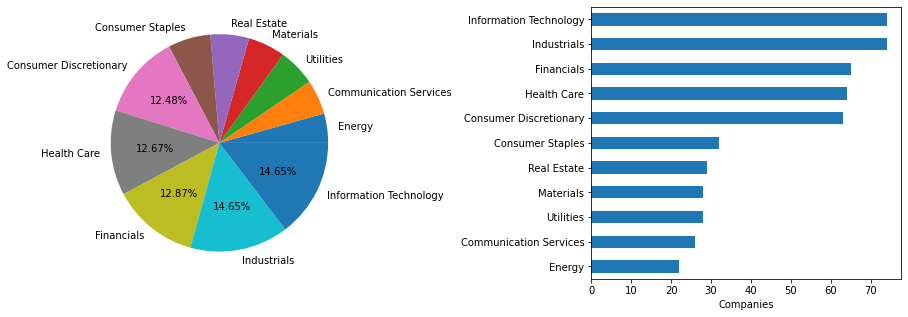

In [105]:
#data for plotting
sectors = df['GICS Sector'].value_counts(ascending=True)

fig, axs= plt.subplots(1, 2, figsize=(15, 5))


#pie plot
def autopct(pct): # only show the label when it's > 10%
    return ('{:.2f}%'.format(pct))  if pct > 10 else ''


sectors.plot(kind='pie', autopct=autopct, ax=axs[0])
axs[0].axes.get_yaxis().set_visible(False)

#bar plot
sectors.plot(kind='barh', ax=axs[1])
axs[1].set_xlabel('Companies')

plt.subplots_adjust(wspace=0.7)

## Sector plot

Text(0.5, 0, 'Companies')

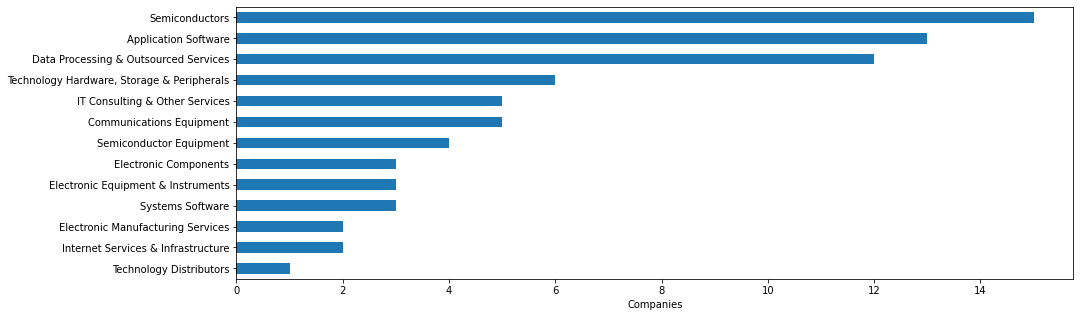

In [106]:
#plot Sub-Industry by number of company
sector = 'Information Technology'

#data for plot
sector_df = df[df['GICS Sector'] == sector]['GICS Sub-Industry'].value_counts(ascending=True)

#plot
fig, ax= plt.subplots(figsize=(15, 5))

#bar plot
sector_df.plot(kind='barh', ax=ax)
ax.set_xlabel('Companies')

## Company plot

In [125]:
company = '3M'
symbol = df[df['Security'] == company]['Symbol'].loc[0]

In [162]:
company_data = yf.Ticker(symbol)

In [152]:
# Common info about company
print(f"Market Cap : {company_data.info['marketCap']}\n")
print(f"Employees : {company_data.info['fullTimeEmployees']}\n")
print(f"Business Summary : \n{company_data.info['longBusinessSummary'][:100]}...")

Market Cap : 115407495168

Employees : 95000

Business Summary : 
3M Company develops, manufactures, and markets various products worldwide. It operates through four ...


In [171]:
company_history = company_data.history(period='5y', interval='1d', actions=False)
company_history.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-05,150.920315,151.714358,149.755135,151.584900,2353600
2016-07-06,151.213732,151.446771,150.229808,151.179214,2383300
2016-07-07,151.118806,151.593509,150.290245,150.928925,1842300
2016-07-08,151.792015,153.449150,151.748871,152.870880,2726600
2016-07-11,153.121221,154.036097,152.931340,153.639069,1659500


Text(0, 0.5, 'Closing Price')

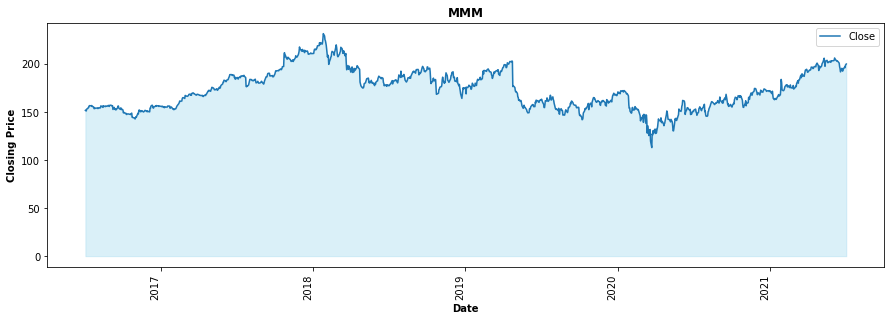

In [172]:
#plot
fig, ax = plt.subplots(figsize=(15, 5))

#closing price
ax.fill_between(company_history.index, company_history.Close, color='skyblue', alpha=0.3)
company_history.plot(y='Close', ax=ax)
plt.xticks(rotation=90)
ax.set_title(symbol, fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Closing Price', fontweight='bold')
